# Investigating Wordle Problem

**Table of contents**<a id='toc0_'></a>    
- [Aim](#toc1_)    
- [Observation](#toc2_)    
- [What next](#toc3_)    
- [Result - Observation](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=3
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[Aim](#toc0_)

The aim of this notebook is to explore the word lists to maybe help later develop the algorithm. The focus as already stated is the NY data file, but assuming that the statistical discribuition of chars in both the lists are pretty similar, the results I get from the NY word list, it should be able to be used on the original without much issues.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import string

ans_path = "./nyt-wordle-answers-alphabetical.txt"
guess_path = "./nyt-wordle-allowed-guesses.txt"

In [92]:
# Count of words in the word lists

with open(ans_path) as fh:
    ans_word_lst = [line.strip() for line in fh]
with open(guess_path) as fh:
    guess_word_lst = [line.strip() for line in fh]
total_word_lst = ans_word_lst + guess_word_lst

pd.DataFrame([[lst[0], len(lst[1])] for lst in [("ans", ans_word_lst), ("guess", guess_word_lst), ("all", total_word_lst)]], columns=["Type", "Count"])

,Type,Count
0,ans,2309
1,guess,10638
2,all,12947


In [93]:
# The char distributions

frequency_df = pd.DataFrame([[char, 0, 0, 0] for char in list(string.ascii_lowercase)], columns=["Char", "Ans", "Guess", "Total"])

for word in ans_word_lst:
    for char in word:
        if char not in string.ascii_lowercase:
            raise ValueError
        frequency_df.loc[frequency_df["Char"] == char, "Ans"] += 1
for word in guess_word_lst:
    for char in word:
        if char not in string.ascii_lowercase:
            raise ValueError
        frequency_df.loc[frequency_df["Char"] == char, "Guess"] += 1

frequency_df["Total"] = frequency_df["Ans"] + frequency_df["Guess"]
        

frequency_df

,Char,Ans,Guess,Total
0,a,975,5008,5983
1,b,280,1344,1624
2,c,475,1546,2021
3,d,393,2055,2448
4,e,1230,5423,6653
5,f,229,883,1112
6,g,310,1329,1639
7,h,387,1367,1754
8,i,670,3082,3752
9,j,27,264,291


The y bar is not same, I care about the proportions and not the values exactly


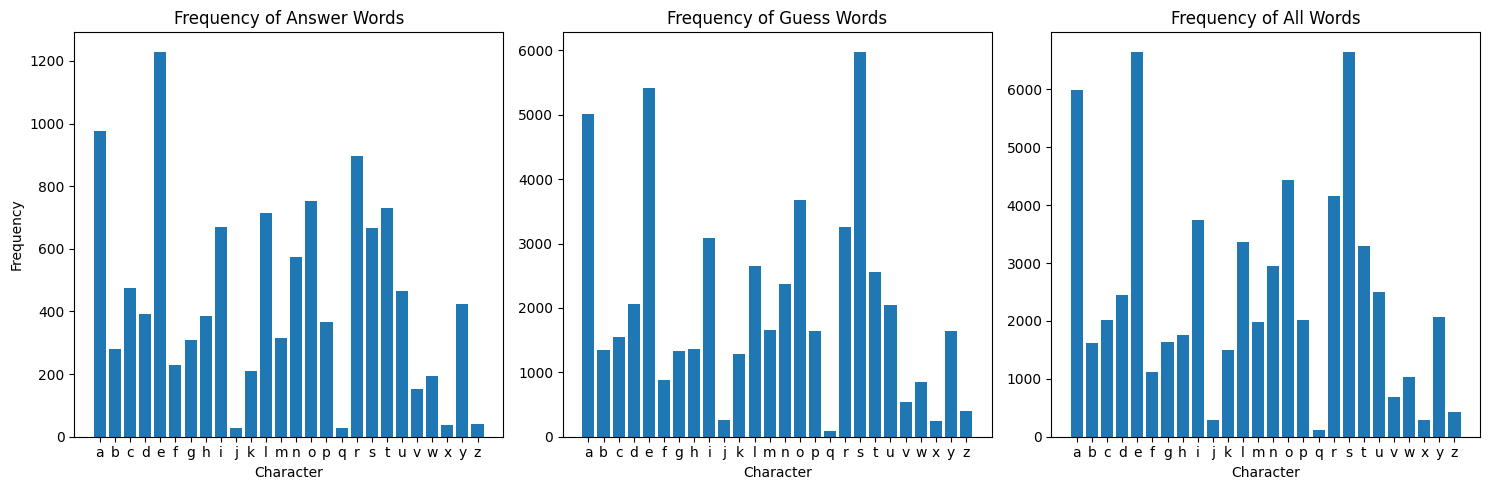

In [94]:
# Plot because why not

print("The y bar is not same, I care about the proportions and not the values exactly")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].bar(frequency_df["Char"], frequency_df["Ans"])
axes[0].set_title("Frequency of Answer Words")
axes[0].set_xlabel("Character")
axes[0].set_ylabel("Frequency")

axes[1].bar(frequency_df["Char"], frequency_df["Guess"])
axes[1].set_title("Frequency of Guess Words")
axes[1].set_xlabel("Character")

axes[2].bar(frequency_df["Char"], frequency_df["Total"])
axes[2].set_title("Frequency of All Words")
axes[2].set_xlabel("Character")

plt.tight_layout()
plt.show()

In [95]:
# not putting the total, as the from the above graph it is evident the shear scale of data scale of guess overwelms ans
# thus am putting a proportional version of it (aka weighted total)
# Weight ratio is 4.60718925942:1 (using total sizes of the 2 word lists to make it)

weighting_const = 4.60718925942

weighted_total = (frequency_df["Ans"] * 4.60718925942) + frequency_df["Guess"]
frequency_df["Total"] = weighted_total  # replacing the main var as this is more useful

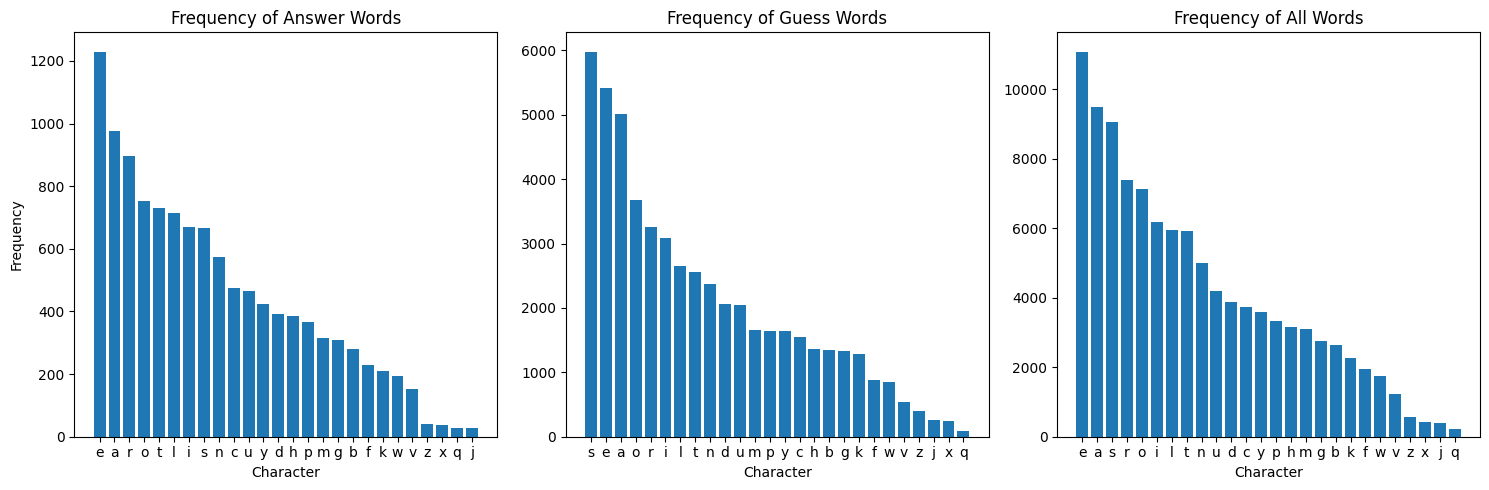

In [96]:
# Make them in decreasing order
# the y is still not scaled as it will not be worth it as we care about proportions

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

ans_sorted = frequency_df.sort_values(by="Ans", ascending=False)
axes[0].bar(ans_sorted["Char"], ans_sorted["Ans"])
axes[0].set_title("Frequency of Answer Words")
axes[0].set_xlabel("Character")
axes[0].set_ylabel("Frequency")

guess_sorted = frequency_df.sort_values(by="Guess", ascending=False)
axes[1].bar(guess_sorted["Char"], guess_sorted["Guess"])
axes[1].set_title("Frequency of Guess Words")
axes[1].set_xlabel("Character")

total_sorted = frequency_df.sort_values(by="Total", ascending=False)
axes[2].bar(total_sorted["Char"], total_sorted["Total"])
axes[2].set_title("Frequency of All Words")
axes[2].set_xlabel("Character")

plt.tight_layout()
plt.show()

In [97]:
# Still the numbers are not really helpful, so lets normalise them by Min-max feature scaling
# X_new = (X_old-X_min)/(X_max-X_min) - range of X_new within [0, 1]

frequency_df["Ans"] = (frequency_df["Ans"] - frequency_df["Ans"].min())/(frequency_df["Ans"].max()-frequency_df["Ans"].min())
frequency_df["Guess"] = (frequency_df["Guess"] - frequency_df["Guess"].min())/(frequency_df["Guess"].max()-frequency_df["Guess"].min())
frequency_df["Total"] = (frequency_df["Total"] - frequency_df["Total"].min())/(frequency_df["Total"].max()-frequency_df["Total"].min())

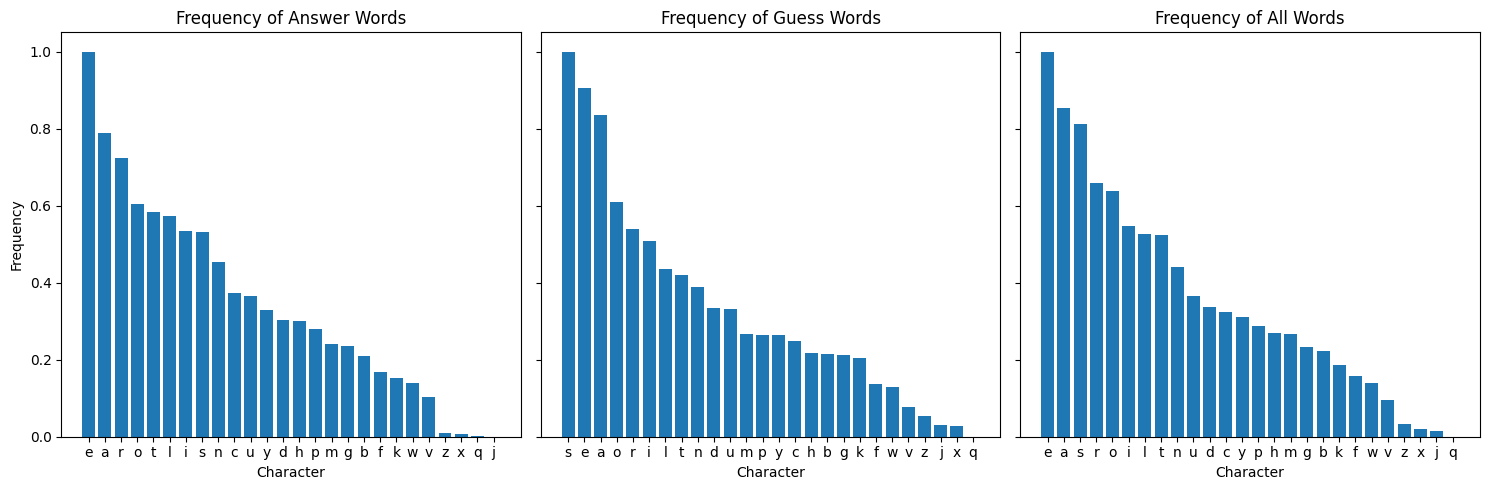

In [98]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)  # y is now shared

ans_sorted = frequency_df.sort_values(by="Ans", ascending=False)
axes[0].bar(ans_sorted["Char"], ans_sorted["Ans"])
axes[0].set_title("Frequency of Answer Words")
axes[0].set_xlabel("Character")
axes[0].set_ylabel("Frequency")

guess_sorted = frequency_df.sort_values(by="Guess", ascending=False)
axes[1].bar(guess_sorted["Char"], guess_sorted["Guess"])
axes[1].set_title("Frequency of Guess Words")
axes[1].set_xlabel("Character")

total_sorted = frequency_df.sort_values(by="Total", ascending=False)
axes[2].bar(total_sorted["Char"], total_sorted["Total"])
axes[2].set_title("Frequency of All Words")
axes[2].set_xlabel("Character")

plt.tight_layout()
plt.show()

## <a id='toc2_'></a>[Observation](#toc0_)

It seems the distibution is different enough between answer and guess that it might effect the guessing (if done randomly).
- The difference between "e" abd "a" in Ans is wider than "s" and "e" in Guess
- The minuscule nature of "z", "x", "q", "j" in Ans can't be seen in Guess.
- In Ans from c to v the shift is pretty much a straight line, while it is more segmented in Guess
- The top letters and bottom letters for Ans and Guess are completely different
- The rank in between are no where the same

## <a id='toc3_'></a>[What next](#toc0_)

The next step is to use these normalised values from ans to grade all the words that I have access to

In [99]:
grade_df = pd.DataFrame(frequency_df[["Char", "Ans"]])
grade_df = grade_df.rename(columns={"Ans": "Weight"})

graded_words_lst = []

# if there is repeating chars, lets decrease the value as the reason for doing this is to chose 
# a first word, so we need as many unique words to get most info
# also repeting letters are in words, but it feels a bit like cheating, thus - imo (2 es five 2 points in total)
for word in total_word_lst:
    total_score = 0
    already_scanned = []
    for char in word:
        if char not in already_scanned:  # thus skipping the scores of duplicates
            total_score += grade_df.loc[grade_df["Char"] == char, "Weight"].values[0]
            already_scanned.append(char)
    graded_words_lst.append([word, total_score])
    

graded_word_df = pd.DataFrame(graded_words_lst, columns=["Word", "Score"])
graded_word_df

,Word,Score
0,aback,1.522860
1,abase,2.531172
2,abate,2.581879
3,abbey,2.328346
4,abbot,2.185370
...,...,...
12942,zuzim,1.150457
12943,zygal,1.936825
12944,zygon,1.633416
12945,zymes,2.113882


In [100]:
graded_word_df.sort_values("Score", ascending=False)

,Word,Score
8602,oater,3.698254
9937,roate,3.698254
8731,orate,3.698254
9711,realo,3.687448
1100,later,3.667498
...,...,...
6135,gyppy,0.846218
6854,jugum,0.840399
7189,kudzu,0.832086
9533,qajaq,0.789692


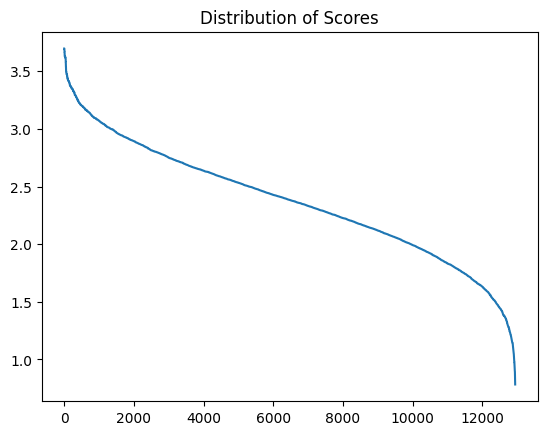

In [101]:
plt.plot([i for i in range(len(total_word_lst))], graded_word_df.sort_values("Score", ascending=False)["Score"])
plt.title("Distribution of Scores")
plt.show()

In [119]:
top = graded_word_df.sort_values("Score", ascending=False)["Word"]
sort_grade = graded_word_df.sort_values("Score", ascending=False)
sort_grade.reset_index(drop=True, inplace=True)

no = 10
for word in top:
    if word in ans_word_lst:
        score = sort_grade.loc[sort_grade["Word"] == word, "Score"].iloc[0]
        rank = sort_grade[sort_grade["Word"] == word].index[0]
        
        print(word, float(score), rank)
        
        no -= 1
        if no == 0:
            break

later 3.6674979218620116 4
alter 3.6674979218620116 5
alert 3.6674979218620116 6
arose 3.6475477971737327 10
irate 3.6292601828761426 15
stare 3.627597672485453 25
arise 3.5785536159600997 43
raise 3.5785536159600997 44
learn 3.5378221113881962 47
renal 3.537822111388196 48


## <a id='toc4_'></a>[Result - Observation](#toc0_)

It looks like an inverted sigmoid function - sorta.

The best scoring words are the following and achieved a score of 3.698254 (btw I am ignoring any calc issues due to floating points) \[pos 0-2]
- oater
- roate
- orate

The top scoring words that belongs to the Answers are the follwing with score - 3.6674979218620116: \[pos 4-6]
- later
- alter
- alert

Thus it is better to use the words later, alter or alert as the starting words as they could be the final words and have almost the same weight as the only guess words (can test it expereimentally).

Thus saving the scoring data in .csv file to use later in the algorithm.

In [ ]:
sort_grade.to_csv("nyt-word-score-ans-weighted.csv", index=False)

In [122]:
# only ans words and only guess words

ans_score_lst = []
guess_score_lst = []
for word in top:
    score = sort_grade.loc[sort_grade["Word"] == word, "Score"].iloc[0]
    if word in ans_word_lst:
        ans_score_lst.append([word, float(score)])
    else:
        guess_score_lst.append([word, float(score)])


ans_score_df = pd.DataFrame(ans_score_lst, columns=["Word", "Score"])
guess_score_df = pd.DataFrame(guess_score_lst, columns=["Word", "Score"])

In [123]:
ans_score_df.to_csv("nyt-word-score-ans-list-ans-weighted.csv", index=False)
guess_score_df.to_csv("nyt-word-score-guess-list-ans-weighted.csv", index=False)